# **Impor Data**

In [1]:
!kaggle competitions download -c seleksi-data-science-academy-compfest-16

seleksi-data-science-academy-compfest-16.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
from zipfile import ZipFile
with ZipFile('seleksi-data-science-academy-compfest-16.zip', 'r') as f:

    f.extractall()

# **Libraries**

In [3]:
import warnings

# Menetapkan aturan untuk mengabaikan semua warning
warnings.filterwarnings("ignore")


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# **Data Loading**

In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")


In [5]:
df_train.head(), df_test.head(), sample_submission.head()

(   id  Alkalinity, total  Calcium  Chloride  Fluoride  Magnesium  \
 0   0              120.0     24.0       6.9     0.314        7.1   
 1   1              140.0     41.0      11.0     0.150        6.5   
 2   2              160.0     51.0       9.0     0.450        9.1   
 3   3               46.0     13.0       2.9     0.120        2.7   
 4   4              240.0    147.0      70.0     0.600       48.0   
 
    Nitrate as N  Sodium  Specific Conductivity  Sulfate  \
 0         0.498    48.0                  510.0     23.2   
 1         0.950    19.0                  300.0      8.5   
 2         2.500    12.0                  370.0     25.0   
 3         0.430     6.4                  110.0      5.0   
 4         6.800    93.0                 1410.0    418.0   
 
    Total Dissolved Solids  Hardness  
 0                   240.0      90.4  
 1                   190.0     130.0  
 2                   230.0     160.0  
 3                    97.0      41.0  
 4                   950.0 

In [6]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB


In [7]:
df_train.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,3199.500000,167.151047,69.350432,53.213620,0.333625,23.446335,3.382707,62.437731,637.631953,71.645934,409.570669,216.148203
std,1847.665193,83.157803,1052.136452,92.934505,0.452473,325.389503,4.878279,556.891904,597.297274,108.414049,302.958442,161.431526
min,0.000000,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,1599.750000,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,3199.500000,153.500000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,4799.250000,209.000000,72.000000,62.000000,0.382250,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,6399.000000,1000.000000,83000.000000,2100.000000,9.000000,26000.000000,106.000000,32000.000000,31400.000000,2000.000000,4100.000000,1901.000000


# **EDA**

3a. Berapa Hardness rata-rata dari sumber air yang memiliki kadar sodium di atas
persentil 75 dan memiliki tingkat kebasaan (Alkalinity) di atas rata-rata?


In [8]:
persentil_75_sodium = df_train['Sodium'].quantile(0.75)
rata_rata_alkalinity = df_train['Alkalinity, total'].mean()
data_filtered = df_train[(df_train['Sodium'] > persentil_75_sodium) & (df_train['Alkalinity, total'] > rata_rata_alkalinity)]
rata_rata_hardness = data_filtered['Hardness'].mean()
print("Rata-rata Hardness dari data yang difilter adalah", rata_rata_hardness)

Rata-rata Hardness dari data yang difilter adalah 383.0833134765625


3b. Apakah ada sumber air yang memiliki tingkat kebasaan (Alkalinity) yang dapat
dianggap outlier? Jelaskan!

In [9]:
#Menghitung Q1 dan Q3 utk alkalinity
Q1 = df_train['Alkalinity, total'].quantile(0.25)
Q3 = df_train['Alkalinity, total'].quantile(0.75)

#Menghitung IQR
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring data yang merupakan outlier
outliers = df_train[(df_train['Alkalinity, total'] < lower_bound) | (df_train['Alkalinity, total'] > upper_bound)]

#Menampilkan Outliers
print("Sumber air yang memiliki tingkat kebasaan (alkalinity) yang dapat dianggap outlier:", outliers)


Sumber air yang memiliki tingkat kebasaan (alkalinity) yang dapat dianggap outlier:         id  Alkalinity, total  Calcium  Chloride  Fluoride  Magnesium  \
34      34              400.0    31.00     160.0      0.40      43.00   
36      36              360.0    16.00     170.0      1.70      14.00   
39      39              617.0    87.30     179.0      1.20      71.20   
48      48              360.0   153.00     146.0      0.10      90.00   
54      54              370.0    69.89      82.8      0.21      32.51   
...    ...                ...      ...       ...       ...        ...   
6193  6193              410.0   110.00     130.0      0.61      72.00   
6204  6204              390.0    81.00      66.0      0.27      53.00   
6206  6206              390.0    52.00      98.0      0.29      35.00   
6323  6323              461.0   126.00     119.0      0.20      58.00   
6363  6363              450.0   200.00     170.0      0.48      57.00   

      Nitrate as N  Sodium  Specific Co

4. Apakah ada hubungan antara Specific Conductivity dan Hardness? Jelaskan!


Korelasi Spearman: 0.8384758509743198
P-value: 0.0


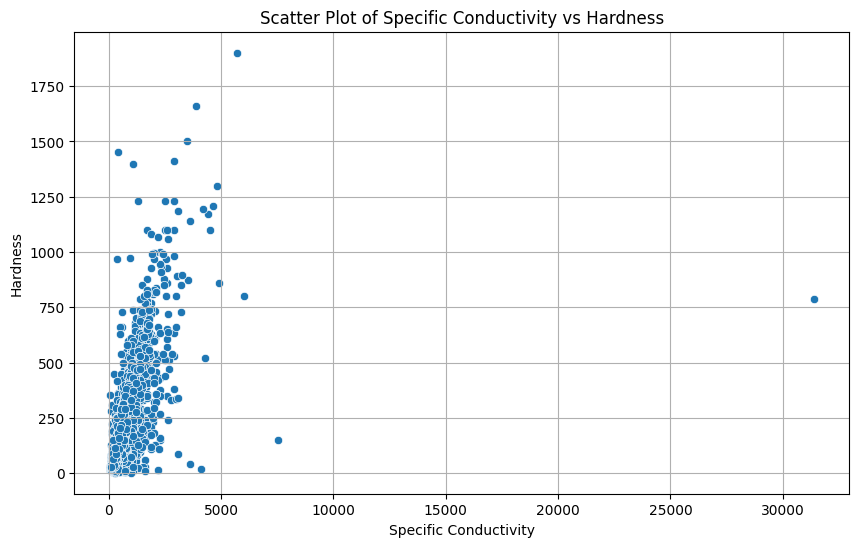

In [10]:
# Mengambil kolom yang diinginkan
specific_conductivity = df_train['Specific Conductivity']
hardness = df_train['Hardness']

# Menghitung korelasi Spearman
correlation, p_value = spearmanr(specific_conductivity, hardness)

# Menampilkan hasil korelasi dan p-value
print("Korelasi Spearman:", correlation)
print("P-value:", p_value)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Specific Conductivity', y='Hardness', data=df_train)
plt.title('Scatter Plot of Specific Conductivity vs Hardness')
plt.xlabel('Specific Conductivity')
plt.ylabel('Hardness')
plt.grid(True)
plt.show()


5. Dari zat-zat kimia yang diberikan, zat-zat apa saja yang paling mempengaruhi dan paling
tidak mempengaruhi Hardness? Jelaskan!


In [11]:
# Define the columns to consider for correlation (exclude 'id' and non-chemical properties)
chemical_columns = [col for col in df_train.columns if col not in ['id', 'Hardness']]

# Calculate Spearman correlation for all chemical properties with 'Hardness'
spearman_correlations = df_train[chemical_columns + ['Hardness']].corr(method='spearman')['Hardness'].sort_values()

# Display correlations
print("Spearman Correlations with Hardness:")
print(spearman_correlations)

# Identify the most and least influential chemicals
print("\nMost Influential Chemicals on Hardness:")
print(spearman_correlations.abs().nlargest(4))

print("\nLeast Influential Chemicals on Hardness:")
print(spearman_correlations.abs().nsmallest(3))


Spearman Correlations with Hardness:
Fluoride                  0.164161
Nitrate as N              0.304983
Sodium                    0.424676
Chloride                  0.606693
Sulfate                   0.711235
Alkalinity, total         0.758763
Total Dissolved Solids    0.832212
Specific Conductivity     0.838476
Magnesium                 0.847766
Calcium                   0.892554
Hardness                  1.000000
Name: Hardness, dtype: float64

Most Influential Chemicals on Hardness:
Hardness                 1.000000
Calcium                  0.892554
Magnesium                0.847766
Specific Conductivity    0.838476
Name: Hardness, dtype: float64

Least Influential Chemicals on Hardness:
Fluoride        0.164161
Nitrate as N    0.304983
Sodium          0.424676
Name: Hardness, dtype: float64


6. Apakah ada pasangan zat kimia yang berkorelasi tinggi? Apakah ada efek dari korelasi
tersebut?

In [12]:
# Calculate the Spearman correlation matrix for all chemical substances
spearman_correlation_matrix = df_train.corr(method='spearman')

# Identify pairs of substances with high correlation (e.g., above 0.8 or below -0.8)
high_correlation_pairs = spearman_correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs != 1]  # Remove self-correlations

high_correlation_pairs = high_correlation_pairs[(high_correlation_pairs > 0.8) | (high_correlation_pairs < -0.8)]

# Display the high correlation pairs
high_correlation_pairs_df = pd.DataFrame(high_correlation_pairs, columns=["Spearman Correlation"])
high_correlation_pairs_df


,,Spearman Correlation
Total Dissolved Solids,Specific Conductivity,0.951120
Specific Conductivity,Total Dissolved Solids,0.951120
Hardness,Calcium,0.892554
Calcium,Hardness,0.892554
Hardness,Magnesium,0.847766
Magnesium,Hardness,0.847766
Hardness,Specific Conductivity,0.838476
Specific Conductivity,Hardness,0.838476
Total Dissolved Solids,Hardness,0.832212
Hardness,Total Dissolved Solids,0.832212


## <h3><b>Preprocessing</h3>

### <h3>Missing Value Handling</h3>

In [42]:
missing_values_train = df_train.isnull().sum()
missing_values_test = df_test.isnull().sum()

missing_values_train, missing_values_test


(id                        0
 Alkalinity, total         0
 Calcium                   0
 Chloride                  0
 Fluoride                  0
 Magnesium                 0
 Nitrate as N              0
 Sodium                    0
 Specific Conductivity     0
 Sulfate                   0
 Total Dissolved Solids    0
 Hardness                  0
 dtype: int64,
 id                        0
 Alkalinity, total         0
 Calcium                   0
 Chloride                  0
 Fluoride                  0
 Magnesium                 0
 Nitrate as N              0
 Sodium                    0
 Specific Conductivity     0
 Sulfate                   0
 Total Dissolved Solids    0
 dtype: int64)

### <h3>Data Types</h3>

In [43]:
data_types_train = df_train.dtypes
data_types_test = df_test.dtypes

data_types_train, data_types_test


(id                          int64
 Alkalinity, total         float64
 Calcium                   float64
 Chloride                  float64
 Fluoride                  float64
 Magnesium                 float64
 Nitrate as N              float64
 Sodium                    float64
 Specific Conductivity     float64
 Sulfate                   float64
 Total Dissolved Solids    float64
 Hardness                  float64
 dtype: object,
 id                          int64
 Alkalinity, total         float64
 Calcium                   float64
 Chloride                  float64
 Fluoride                  float64
 Magnesium                 float64
 Nitrate as N              float64
 Sodium                    float64
 Specific Conductivity     float64
 Sulfate                   float64
 Total Dissolved Solids    float64
 dtype: object)

### <h3>Feature Scalling</h3>

In [45]:
# Features to be scaled (excluding 'id' and 'Hardness' in train data)
features_to_scale = df_train.columns.drop(['id', 'Hardness'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the training features
df_train[features_to_scale] = scaler.fit_transform(df_train[features_to_scale])

# Standardize the test features
df_test[features_to_scale] = scaler.transform(df_test[features_to_scale])

# Display the first few rows of the standardized data
df_train.head(), df_test.head()


(   id  Alkalinity, total   Calcium  Chloride  Fluoride  Magnesium  \
 0   0          -0.567051 -0.043107 -0.498386 -0.043376  -0.050240   
 1   1          -0.326526 -0.026948 -0.454265 -0.405857  -0.052084   
 2   2          -0.086000 -0.017442 -0.475787  0.257218  -0.044093   
 3   3          -1.456995 -0.053562 -0.541430 -0.472164  -0.063763   
 4   4           0.876101  0.073808  0.180640  0.588756   0.075465   
 
    Nitrate as N    Sodium  Specific Conductivity   Sulfate  \
 0     -0.591383 -0.025928              -0.213699 -0.446895   
 1     -0.498720 -0.078006              -0.565310 -0.582497   
 2     -0.180961 -0.090577              -0.448107 -0.430291   
 3     -0.605324 -0.100634              -0.883435 -0.614783   
 4      0.700567  0.054884               1.293206  3.194984   
 
    Total Dissolved Solids  Hardness  
 0               -0.559760      90.4  
 1               -0.724812     130.0  
 2               -0.592770     160.0  
 3               -1.031808      41.0  
 4 

### <h3>Outliers Handling</h3>

In [46]:
from scipy.stats import zscore

# Calculate Z-scores for the training data features (excluding 'id' and 'Hardness')
z_scores = df_train[features_to_scale].apply(zscore)

# Identify outliers (Z-score > 3 or Z-score < -3)
outliers = (z_scores.abs() > 3).sum()

outliers


Alkalinity, total          74
Calcium                     2
Chloride                   86
Fluoride                   93
Magnesium                   1
Nitrate as N               86
Sodium                      3
Specific Conductivity      58
Sulfate                   143
Total Dissolved Solids    102
dtype: int64

In [47]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Apply RobustScaler to the training features
df_train[features_to_scale] = robust_scaler.fit_transform(df_train[features_to_scale])

# Apply RobustScaler to the test features
df_test[features_to_scale] = robust_scaler.transform(df_test[features_to_scale])

# Display the first few rows of the robust scaled data
df_train.head(), df_test.head()


(   id  Alkalinity, total   Calcium  Chloride  Fluoride  Magnesium  \
 0   0          -0.338384 -0.446809 -0.413725  0.429309  -0.389831   
 1   1          -0.136364 -0.085106 -0.333333 -0.247678  -0.423729   
 2   2           0.065657  0.127660 -0.372549  0.990712  -0.276836   
 3   3          -1.085859 -0.680851 -0.492157 -0.371517  -0.638418   
 4   4           0.873737  2.170213  0.823529  1.609907   1.920904   
 
    Nitrate as N    Sodium  Specific Conductivity   Sulfate  \
 0     -0.435362  0.333333              -0.021739 -0.136111   
 1     -0.304348 -0.410256              -0.478261 -0.340278   
 2      0.144928 -0.589744              -0.326087 -0.111111   
 3     -0.455072 -0.733333              -0.891304 -0.388889   
 4      1.391304  1.487179               1.934783  5.347222   
 
    Total Dissolved Solids  Hardness  
 0               -0.285714      90.4  
 1               -0.464286     130.0  
 2               -0.321429     160.0  
 3               -0.796429      41.0  
 4 

### <h3>Split data</h3>

In [59]:
from sklearn.model_selection import train_test_split
# Example to clean the column names from special JSON characters (if not already cleaned)
df_train.columns = [col.replace('{', '').replace('}', '').replace(':', '').replace('"', '').replace(',', '') for col in df_train.columns]

# Extract features and target from the training data
X = df_train.drop(['id', 'Hardness'], axis=1)
y = df_train['Hardness']

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_val.shape


((5120, 10), (1280, 10))

# **Modelling**

# **LGBM**

In [60]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Initialize the LightGBM regressor
lgbm_model = lgb.LGBMRegressor(
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

# Train the model on the training data
lgbm_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='mse')

# Predict on the validation set
y_pred_val = lgbm_model.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2447
[LightGBM] [Info] Number of data points in the train set: 5120, number of used features: 10
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 215.428478
Mean Absolute Error (MAE): 23.117998070757686
Mean Squared Error (MSE): 1882.5699964959954
R-squared (R2) Score: 0.9315032096598423


# **Prediction**

In [64]:
# Prepare test features
X_test = df_test.drop('id', axis=1)

# Predict using the trained model
y_test_pred = lgbm_model.predict(X_test)

# Prepare submission dataframe
submission_df = pd.DataFrame({'id': df_test['id'], 'Hardness': y_test_pred})

# Save submission file
submission_df.to_csv('submission.csv', index=False)


In [62]:
submission_df

,id,Hardness
0,6400,94.654242
1,6401,103.163794
2,6402,115.813054
3,6403,96.040250
4,6404,307.917352
...,...,...
1596,7996,86.235820
1597,7997,51.843164
1598,7998,213.004619
1599,7999,242.705755
